<a href="https://colab.research.google.com/github/EmmanuvelCL/manu/blob/main/WORLD_HAPPINESS_INDEX_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Dependencies

import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector as selector
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/WorldHappiness_Corruption_2015_2020.csv")
df

,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score
0,Norway,7.5370,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Europe,2015,0.000000,88
1,Denmark,7.5220,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Europe,2015,0.000000,91
2,Iceland,7.5040,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Europe,2015,0.000000,79
3,Switzerland,7.4940,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Europe,2015,0.000000,86
4,Finland,7.4690,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Europe,2015,0.000000,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,Botswana,3.4789,0.997549,0.000000,0.494102,0.509089,0.033407,0.101786,0.257241,Africa,2020,1.085695,60
788,Tanzania,3.4762,0.457163,0.000000,0.442678,0.509343,0.271541,0.203881,0.718963,Africa,2020,0.872675,38
789,Rwanda,3.3123,0.343243,0.000000,0.572383,0.604088,0.235705,0.485542,0.548445,Africa,2020,0.522876,54
790,Zimbabwe,3.2992,0.425564,0.000000,0.375038,0.377405,0.151349,0.080929,0.841031,Africa,2020,1.047835,24


In [ ]:
#Check the column-wise null values for cleaning

df.isnull().sum()

Country              0
happiness_score      0
gdp_per_capita       0
family               0
health               0
freedom              0
generosity           0
government_trust     0
dystopia_residual    0
continent            0
Year                 0
social_support       0
cpi_score            0
dtype: int64

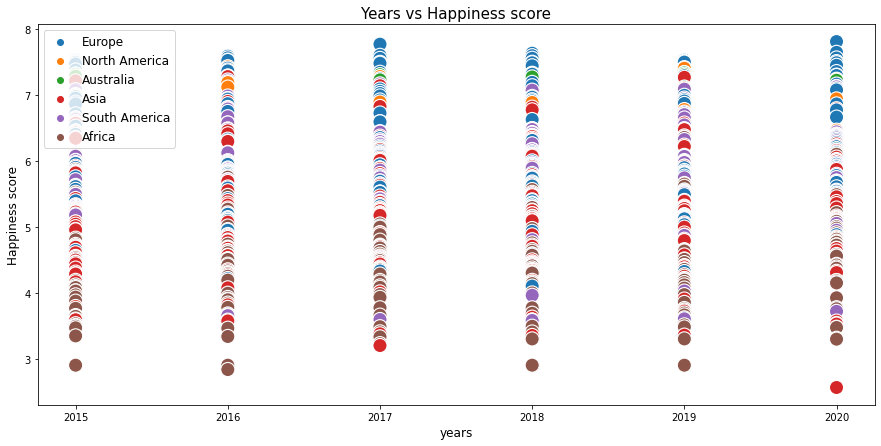

In [ ]:
#Compare the Year_wise changes in the happiness score of all continents using Scatter plot
plt.rcParams["figure.figsize"] = (15,7)
sns.scatterplot(x = df.Year,y = df.happiness_score,hue = df.continent,s=200)
plt.legend(loc= "upper left",fontsize = 12)
plt.title("Years vs Happiness score",fontsize = 15)
plt.xlabel("years",fontsize = 12)
plt.ylabel("Happiness score",fontsize=12)
plt.show()

In [ ]:
#finding the total happiness score in each continents
score_region = df.groupby("continent")["happiness_score"].sum()
score_region

continent
Africa            835.957300
Asia             1169.396699
Australia          87.468400
Europe           1412.167400
North America     126.009700
South America     703.861900
Name: happiness_score, dtype: float64

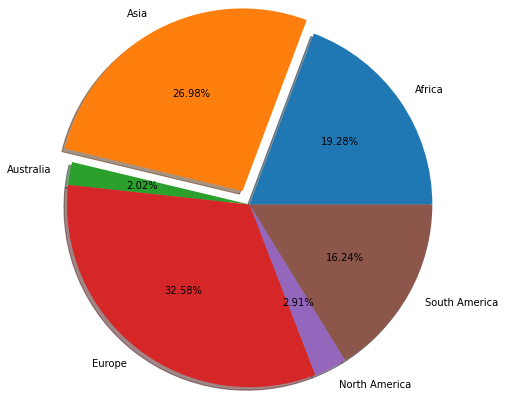

In [ ]:
#Pie chart representation of happiness score of Asia from last 6 Years
label = ["Africa","Asia","Australia","Europe","North America","South America"]

plt.axis=("equal")
plt.pie(x = score_region,labels =label, autopct="%1.2f%%",radius = 1.2,shadow= True,explode=[0,0.1,0,0,0,0])
plt.savefig("Piechart.jpg", bbox_inches='tight',pad_inches=1, transparent=True)

In [ ]:
#List the total countries in all continents
total_country = df.groupby("continent")[["Country"]].count()
print(total_country)

               Country
continent             
Africa             192
Asia               222
Australia           12
Europe             228
North America       18
South America      120


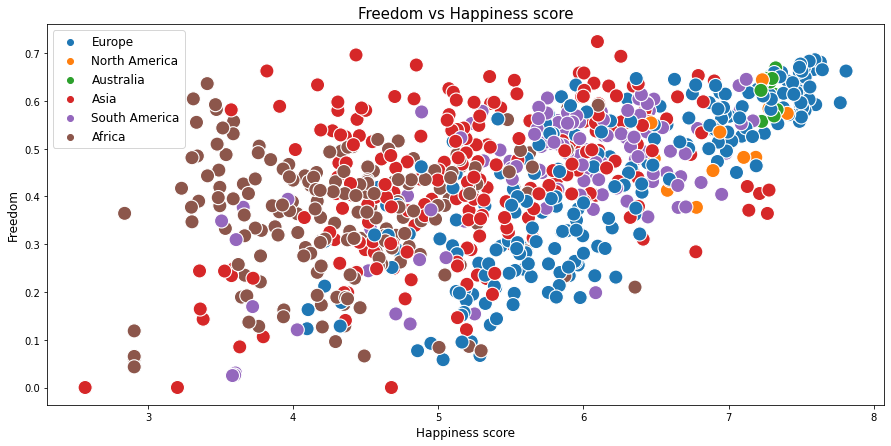

In [ ]:
#Comparison Between Freedom_to make_life_choices and Happiness_score
plt.rcParams["figure.figsize"] = (15,7)
sns.scatterplot(x = df.happiness_score,y = df.freedom,hue = df.continent,s=200)
plt.legend(loc= "upper left",fontsize = 12)
plt.title("Freedom vs Happiness score",fontsize = 15)
plt.xlabel("Happiness score",fontsize = 12)
plt.ylabel("Freedom",fontsize=12)
plt.show()

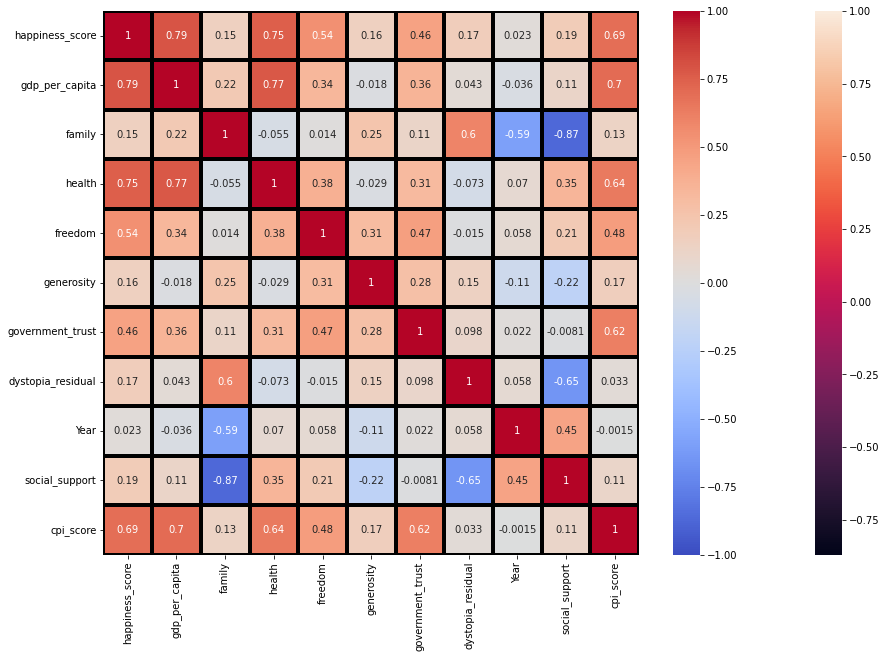

In [ ]:
#correlation matrix

plt.figure(figsize=(15, 10))

sns.heatmap(df.corr())

sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')


plt.show()

In [ ]:
#Representation of Top 10 Countries having largest life expectancy and BOttom 10 Contries having least life expectancy
top_10 = df.head(10)
bottom_10= df.tail(10)

Text(604.1068181818181, 0.5, 'Life Expectancy')

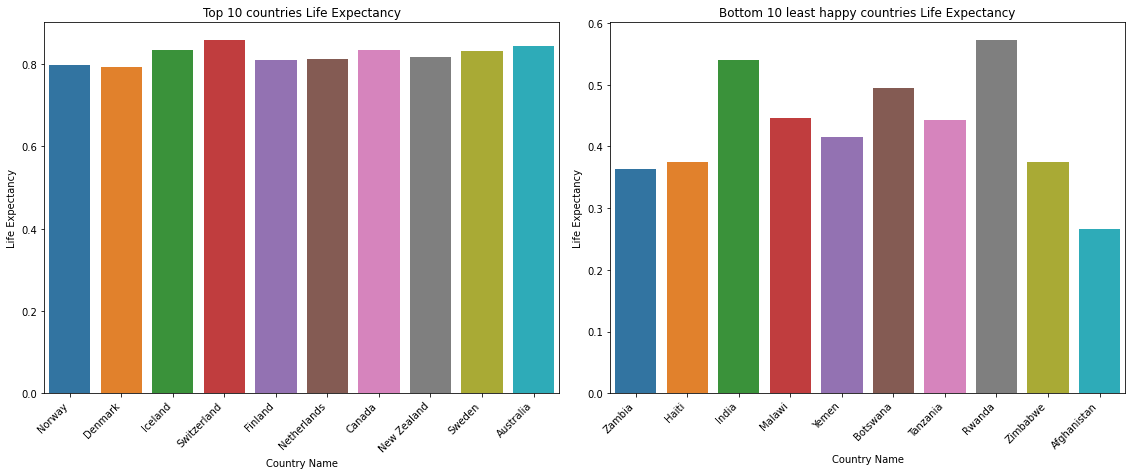

In [ ]:
fig,axes = plt.subplots(1,2, figsize = (16,6))
plt.tight_layout(pad=2)
xlabels = top_10.Country
axes[0].set_title("Top 10 countries Life Expectancy")
axes[0].set_xticklabels(xlabels,rotation = 45,ha="right")
sns.barplot(x=top_10.Country,y=top_10.health,ax=axes[0])
axes[0].set_xlabel("Country Name")
axes[0].set_ylabel("Life Expectancy")

xlabels = bottom_10.Country
axes[1].set_title("Bottom 10 least happy countries Life Expectancy")
axes[1].set_xticklabels(xlabels,rotation = 45,ha="right")
sns.barplot(x=bottom_10.Country,y=bottom_10.health,ax=axes[1])
axes[1].set_xlabel("Country Name")
axes[1].set_ylabel("Life Expectancy")


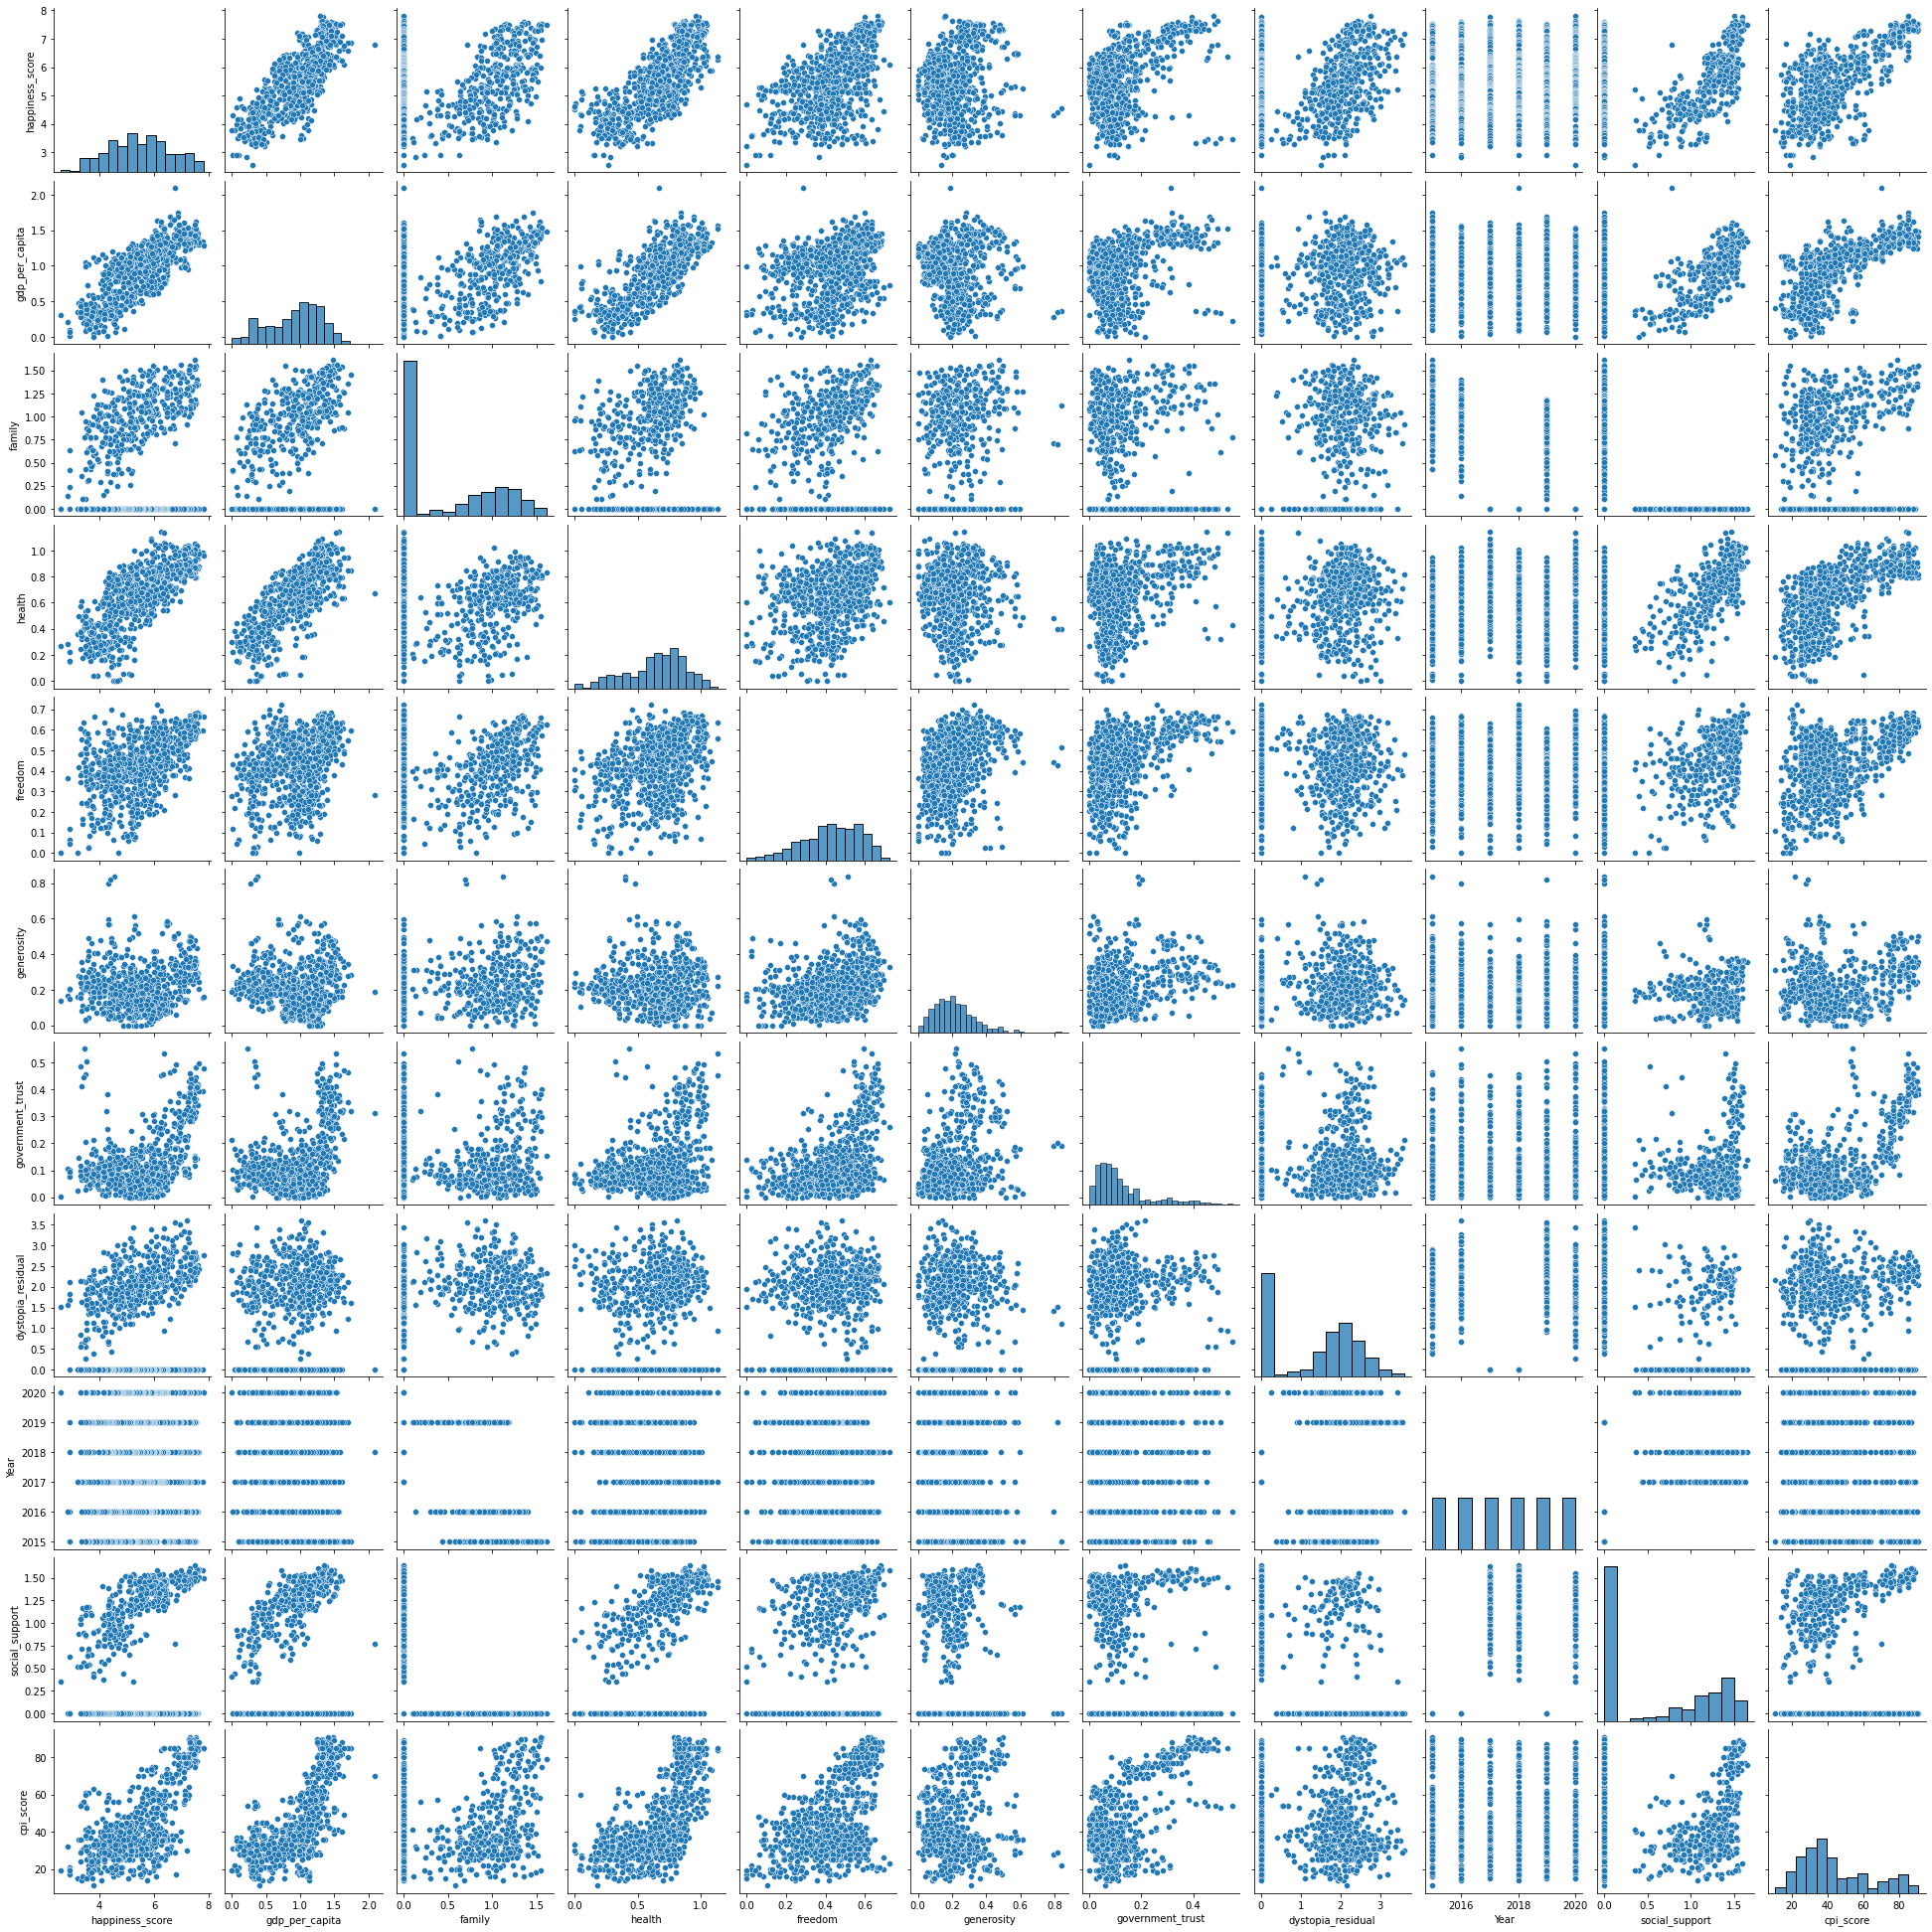

In [ ]:
#Plotting Pair-Wise Relationship in the dataset

sns.pairplot(df)

In [ ]:
#Graphics_Visualization_Of_Happiness_score

import plotly.graph_objs as go
from plotly.offline import iplot

data = dict(type = 'choropleth',
           locations = df['Country'],
           locationmode = 'country names',
           colorscale='RdYlGn',
           z = df['happiness_score'],
           text = df['Country'],
           colorbar = {'title':'Happiness Score'})

layout = dict(title = 'Geographical Visualization of Happiness Score',
              geo = dict(showframe = True, projection = {'type': 'azimuthal equal area'}))

choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

In [ ]:
X = df.drop(["happiness_score","dystopia_residual","cpi_score"],axis=1)
y = df["happiness_score"]

In [ ]:
#Seperate the categorical & Numerical columns from Feature_columns
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(X)
categorical_columns = categorical_columns_selector(X)

In [ ]:
numerical_columns

['gdp_per_capita',
 'family',
 'health',
 'freedom',
 'generosity',
 'government_trust',
 'Year',
 'social_support']

In [ ]:
categorical_columns

['Country', 'continent']

In [ ]:
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

In [ ]:
#Scale the numerical data using standard scaler & Convert the categorical data using one_hot_encoder with the help of column_transformer Library

preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standard_scaler', numerical_preprocessor, numerical_columns)])

In [ ]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(preprocessor, LinearRegression())
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Country', 'continent']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['gdp_per_capita', 'family',
                                                   'health', 'freedom',
                                                   'generosity',
                                                   'government_trust', 'Year',
                                                   'social_support'])])),
                ('linearregression', LinearRegression())])

In [ ]:
#Train the Model
model.fit(X,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Country', 'continent']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['gdp_per_capita', 'family',
                                                   'health', 'freedom',
                                                   'generosity',
                                                   'government_trust', 'Year',
                                                   'social_support'])])),
                ('linearregression', LinearRegression())])

In [ ]:
#Accuracy
model.score(X,y)

0.9579237117150511

In [ ]:
#Predict the Happiness_score of Specific country in different years from the dataset

model.predict(X[X["Country"]== "India"])

array([4.1787591 , 3.99484947, 4.2465193 , 4.22354564, 4.08172301,
       4.3369034 ])

In [ ]:
y_pred = model.predict(X[X["Country"]== "India"])

In [ ]:
actual = df[df.Country == "India"]
actual.happiness_score

107    4.3150
231    4.5650
384    4.0150
510    4.1900
628    4.4040
784    3.5733
Name: happiness_score, dtype: float64

In [ ]:
#Compare Actual and Predicted Happiness score
actual_vs_pred = pd.DataFrame({"Actual":actual.happiness_score,"Predicted":y_pred})
actual_vs_pred

,Actual,Predicted
107,4.3150,4.178759
231,4.5650,3.994849
384,4.0150,4.246519
510,4.1900,4.223546
628,4.4040,4.081723
784,3.5733,4.336903
